Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


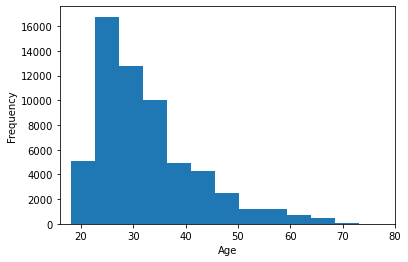

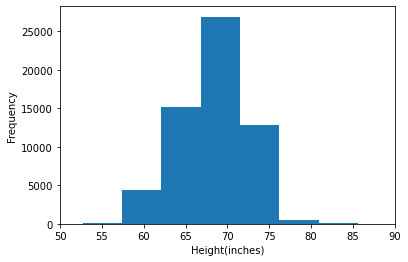

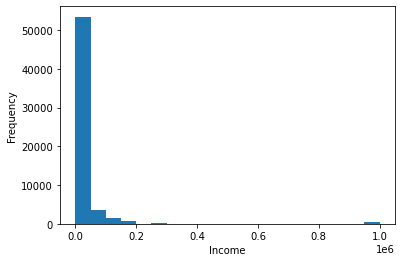

<AxesSubplot:>

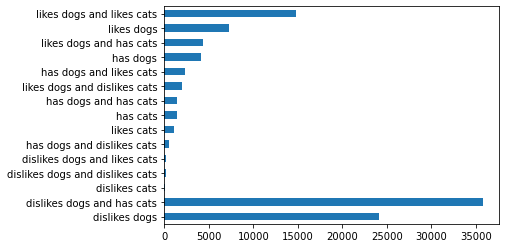

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier    

profiles = pd.read_csv("profiles.csv")

#print all columns
print(profiles.columns)
    
#     histogram of age and frequency
plt.hist(profiles['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

#     histogram of height
plt.hist(profiles['height'], bins=20)
plt.xlabel("Height(inches)")
plt.ylabel("Frequency")
plt.xlim(50, 90)
plt.show()


#     histogram of income
plt.hist(profiles['income'], bins=20)
plt.xlabel("Income")
plt.ylabel("Frequency")
 
plt.show()


profiles['sex'].value_counts().sort_values().plot(kind = 'barh')

profiles['pets'].value_counts().sort_values().plot(kind = 'barh')


In [2]:
import numpy as np

print(profiles['age'].value_counts())



#created drinks_code which matches user with a drinking score
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
profiles["drinks_code"] = profiles.drinks.map(drink_mapping)
#created smokes_code which matches user with a smoking score
smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes":3, "trying to quit":4}
profiles["smokes_code"] = profiles.smokes.map(smokes_mapping)
#created drugs_code which matches user with a drugs score
drugs_mapping ={"never": 0, "sometimes": 1, "often": 2}
profiles["drugs_code"] = profiles.drugs.map(drugs_mapping)
print(profiles['drugs_code'].value_counts())



26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64
0.0    37724
1.0     7732
2.0      410
Name: drugs_code, dtype: int64


In [3]:


# essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
 
# # Removing the NaNs
# all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# # Combining the essays
# all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
 
# df["essay_len"] = all_essays.apply(lambda x: len(x))







In [4]:
from sklearn.preprocessing import scale


# feature_data = df[['smokes_code']]

# scaled_data = scale(feature_data, axis=0)
# interested_df = pd.DataFrame(scaled_data)
# interested_df = interested_df.fillna(0).replace(np.nan, 0)
# interested_df = interested_df.reset_index()
# interested_df = np.nan_to_num(interested_df)
# pd.DataFrame(interested_df).drop(pd.DataFrame(interested_df).columns[np.isnan(interested_df).any()], axis=1)
# print(interested_df)
 
# feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)



labels = profiles['age']
data = profiles[['drinks_code','drugs_code','smokes_code']]
scaled_data = scale(data, axis=0)

print(scaled_data[0])


[ 0.13460076 -0.45279779  0.60992846]


In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

# classifier = KNeighborsClassifier(n_neighbors = 5)

# classifier.fit(train_data, train_labels)

# print(classifier.score(test_data, test_labels))

# print(np.isnan(train_data.any()))
# print(np.isfinite(train_data.all()))
# print(np.isnan(train_labels.any()))
# print(np.isfinite(train_labels.all()))

# classifier = KNeighborsClassifier(n_neighbors = 5)
# classifier.fit(train_data, train_labels)
# print(classifier.score(test_data, test_labels))

In [6]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import matplotlib.pyplot as plt

scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(scores)
plt.show()